This notebook is going to be used for learning and practicing the use of an ordinary least squares regression model in Python.
More specifically, I want to learn and understand the fundamental statistics within linear regression.

*I will greatly appreciate any feedback regarding the code or statistics, as I'm trying to learn as much as I can. Thanks.*

<a id='ToC'></a>

# Table of Contents
* [Data Exploration](#data_explore)
    * [Data Cleanup](#data_clean)
    * [Correlation Analysis](#corr_analysis)
* [Ordinary Least Squares Regression Model](#OLS)
    * [OLS Model Analysis](#OLS_analysis)    
* [Ordinary Least Squares Regression Model With Zeros Removed](#new_OLS)
    * [New OLS Model Analysis](#new_OLS_analysis)    
* [Summary](#summary)  
   

In [1]:
import pandas as pd
import numpy as np
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde
from statsmodels.graphics.gofplots import ProbPlot
from scipy import stats

<a id='data_explore'></a>

# Data Exploration
[Back to Table of Contents](#ToC)

This dataset consists of many measures for individual golfers on the PGA Tour. Each golfer has data for nearly 1500 variables, which is also grouped by date. 
So after each week, each golfer's data is updated and a new entry is made for them.

In [2]:
# Load CSV file data into a dataframe.
df = pd.read_csv("/kaggle/input/pga-tour-20102018-data/2019_data.csv")
df.head()

,Player Name,Date,Statistic,Variable,Value
0,Cameron Champ,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),78
1,Rory McIlroy,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),72
2,Luke List,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),66
3,Dustin Johnson,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),73
4,Wyndham Clark,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),87


<a id='data_clean'></a>

## Data Cleanup
[Back to Table of Contents](#ToC)

In [3]:
# Transpose the statistic variables such that there is 1 golfer per row, each with columns for
# every statistic variable.
df = df.set_index(['Player Name', 'Variable', 'Date'])['Value'].unstack('Variable').reset_index()

# Typecast the Date column to datetime objects so they can be quantified.
df['Date'] = pd.to_datetime(df['Date'])

# Select data from 8/25/19, which was the end of the 2018-2019 PGA season.
df = df[(df['Date'] == '2019-08-25')]

# Typecast data points to numeric data types, except Player Name and Date columns.
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').fillna(0)

df.head()

Variable,Player Name,Date,% of Potential Pts won - FedExCup Playoffs - (# OF TOP 10'S),% of Potential Pts won - FedExCup Playoffs - (# OF WINS),% of Potential Pts won - FedExCup Playoffs - (%),% of Potential Pts won - FedExCup Playoffs - (EVENTS),% of Potential Pts won - FedExCup Playoffs - (PLAYOFF POINTS WON),% of Potential Pts won - FedExCup Playoffs - (POTENTIAL PTS),% of Potential Pts won - FedExCup Regular Season - (# OF TOP 10'S),% of Potential Pts won - FedExCup Regular Season - (# OF WINS),...,Total Eagles - (ROUNDS),Total Eagles - (TOTAL),Total Hole Outs - (HOLE OUTS),Total Hole Outs - (ROUNDS),Total Money (Official and Unofficial) - (EVENTS),Total Money (Official and Unofficial) - (MONEY),Total Putting - (EVENTS),Total Putting - (TOTAL),Victory Leaders - (EVENTS),Victory Leaders - (VICTORIES)
9,NaN,2019-08-25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,Aaron Baddeley,2019-08-25,0.0,0.0,0.00,0.0,0.0,0.0,3.0,0.0,...,55.0,4.0,11.0,55.0,18.0,0.0,18.0,85.7,18.0,0.0
92,Aaron Pike,2019-08-25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,Aaron Rai,2019-08-25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0
154,Aaron Wise,2019-08-25,0.0,0.0,2.03,21.0,41.0,0.0,1.0,0.0,...,72.0,3.0,6.0,72.0,21.0,0.0,21.0,268.8,21.0,0.0


In [4]:
# Check all of the statistic variables available in the dataset.
for col in df.columns[2:]:
    print(col)

% of Potential Pts won - FedExCup Playoffs - (# OF TOP 10'S)
% of Potential Pts won - FedExCup Playoffs - (# OF WINS)
% of Potential Pts won - FedExCup Playoffs - (%)
% of Potential Pts won - FedExCup Playoffs - (EVENTS)
% of Potential Pts won - FedExCup Playoffs - (PLAYOFF POINTS WON)
% of Potential Pts won - FedExCup Playoffs - (POTENTIAL PTS)
% of Potential Pts won - FedExCup Regular Season - (# OF TOP 10'S)
% of Potential Pts won - FedExCup Regular Season - (# OF WINS)
% of Potential Pts won - FedExCup Regular Season - (%)
% of Potential Pts won - FedExCup Regular Season - (EVENTS)
% of Potential Pts won - FedExCup Regular Season - (POINTS WON)
% of Potential Pts won - FedExCup Regular Season - (POTENTIAL PTS)
1-Putts per Round - (AVG)
1-Putts per Round - (ROUNDS)
1-Putts per Round - (TOTAL 1 PUTTS)
1-Putts per Round - (TOTAL ROUNDS)
11-25 Final Round Performance - (# OF TIMES IMPROVED)
11-25 Final Round Performance - (% TIMES IMPROVED)
11-25 Final Round Performance - (EVENTS)
2-Pu

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


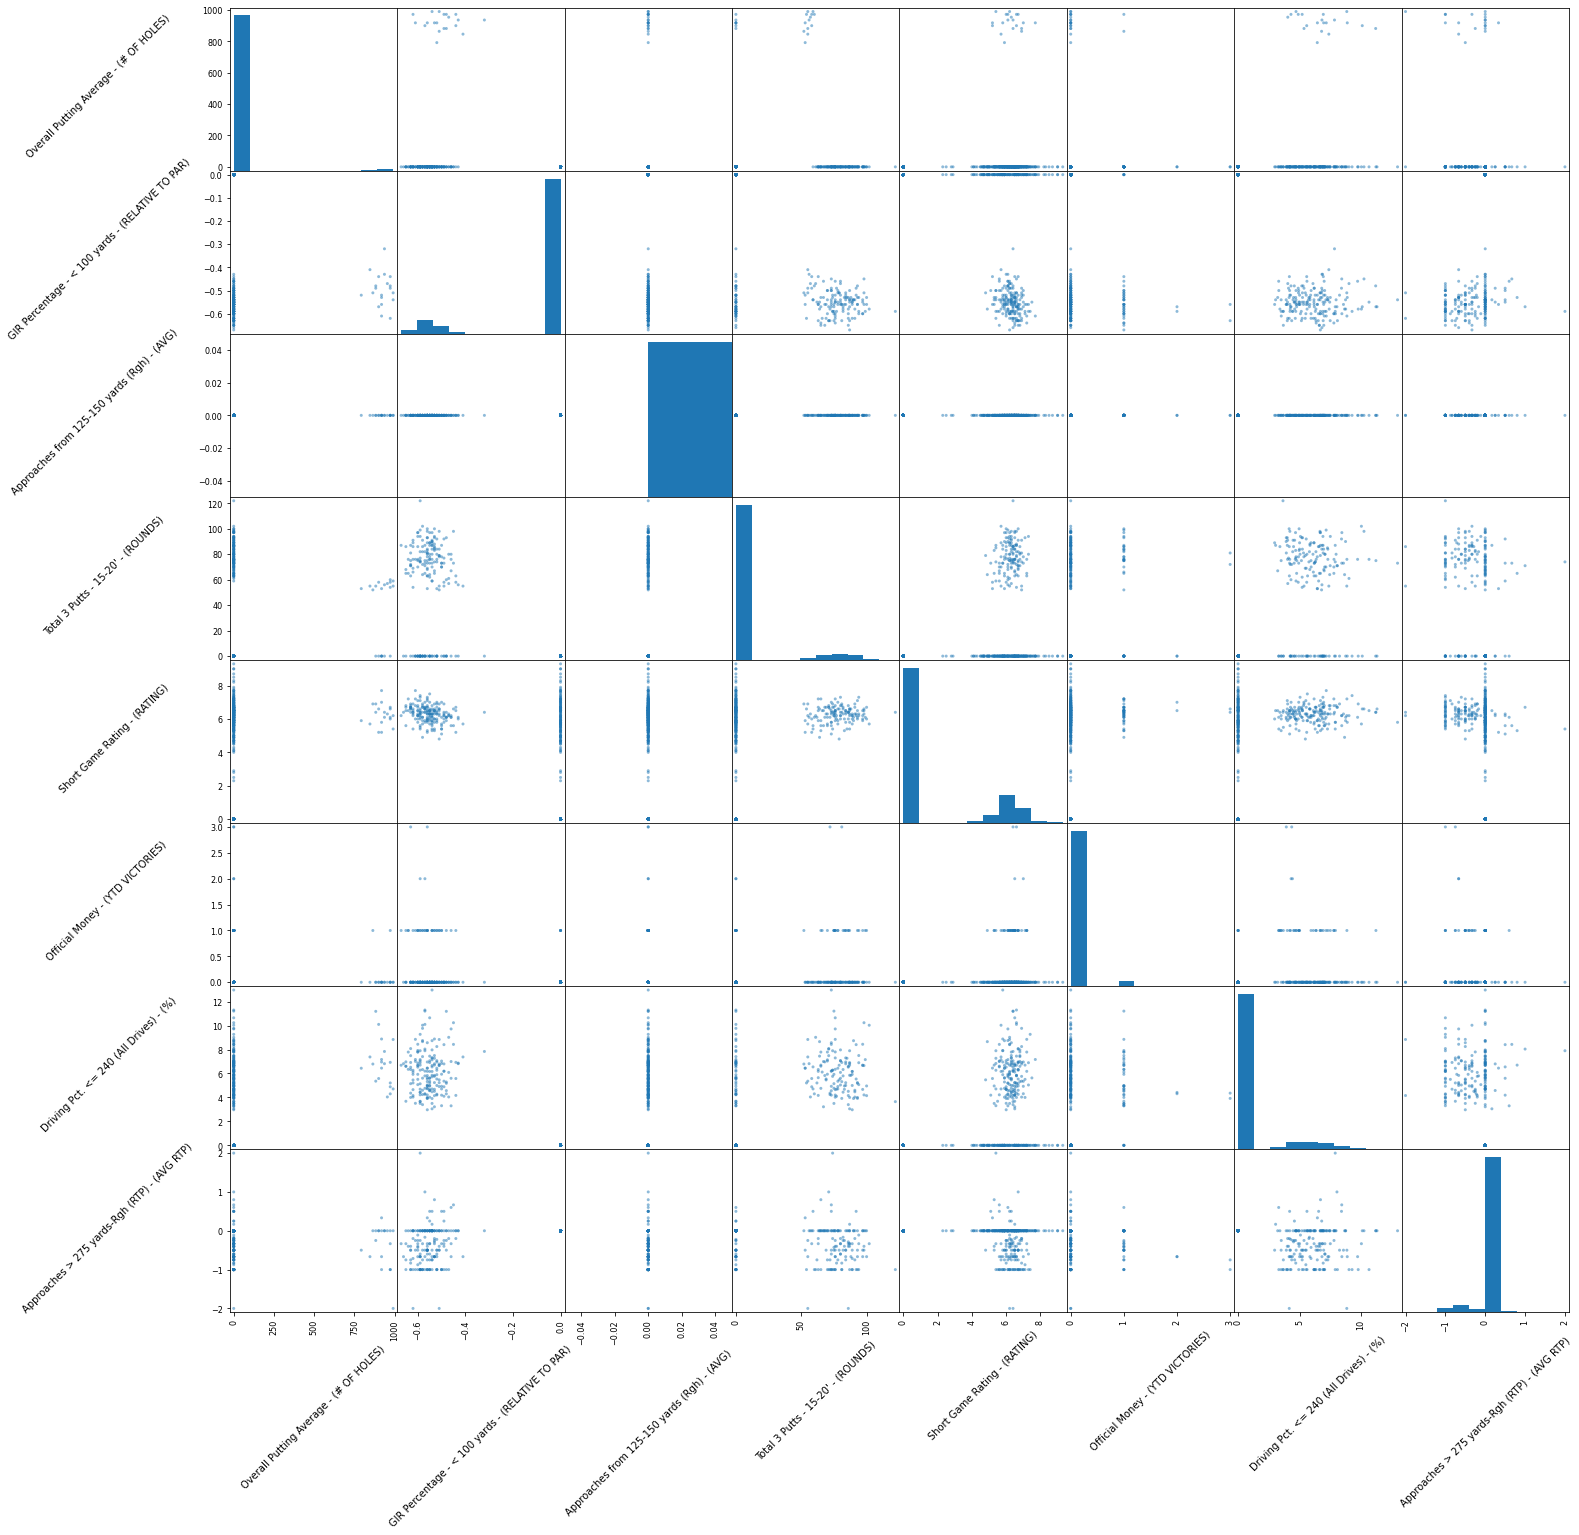

In [5]:
# Visualize the distribution and colinearity for a sample of random variables.

sample_df = df.iloc[:, 2:].sample(n=8, axis=1)

fig1 = pd.plotting.scatter_matrix(sample_df, figsize=(24, 24))

for x in range(len(sample_df.columns)):
    for y in range(len(sample_df.columns)):
        ax = fig1[x, y]
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(45)
        ax.yaxis.labelpad = 100

There seems to be many variables that are highly correlated with each other. Also the distribution for many variables is zero-inflated.

This multicolinearity and zero-inflated distribution should negatively influence the model.

<a id='corr_analysis'></a>

## Correlation Analysis
[Back to Table of Contents](#ToC)

I choose a variable to focus on for the correlation analysis. This is the potential dependent
variable. We'll be able to compare other variables with it to determine if there's a
linear relationship. This information will be used to decide dependent and independent variables.

In [6]:
selected_var = 'Greens in Regulation Percentage - (%)'

In [7]:
# Only keep the average, percentage, and points variables, otherwise there will be many 1.0 co-efficients cluttering the analysis.
for col in df.columns:
    if 'AVG' not in col and '%' not in col and 'POINTS' not in col:
        del df[col]

In [8]:
# Create a sorted Pierson correlation matrix to understand variable pair relationships.

matrix_df = df.corr().abs()
unstack_matrix = matrix_df.unstack()
sorted_matrix = unstack_matrix.sort_values(kind='quicksort', ascending=False, na_position='first').dropna()
  
print('ALL CORRELATIONS ARE BETWEEN \"{}\" AND AN ARBITRARY VARIABLE'.format(selected_var))
print('='*95+'\n')
    
count = 0
for pair, val in sorted_matrix.items():
    if pair[1] == selected_var and count < 10:
        print('{:68} PIERSON CO-EFF.'.format(pair[0] + ' ,'))
        print('{:68} {}'.format(pair[1], val))
        print('-'*88)
        count += 1

ALL CORRELATIONS ARE BETWEEN "Greens in Regulation Percentage - (%)" AND AN ARBITRARY VARIABLE

Greens in Regulation Percentage - (%) ,                              PIERSON CO-EFF.
Greens in Regulation Percentage - (%)                                1.0
----------------------------------------------------------------------------------------
Greens or Fringe in Regulation - (%) ,                               PIERSON CO-EFF.
Greens in Regulation Percentage - (%)                                0.9998226302659723
----------------------------------------------------------------------------------------
GIR Percentage - 100+ yards - (%) ,                                  PIERSON CO-EFF.
Greens in Regulation Percentage - (%)                                0.9996609441882279
----------------------------------------------------------------------------------------
GIR Percentage from Fairway - (%) ,                                  PIERSON CO-EFF.
Greens in Regulation Percentage - (%)           

There are many extremely correlated variables, which again emphasizes the significant multicollinearity of this data.

In [9]:
# Select the highly correlated pairs that contain the selected variable.

pairs = []

for pair, val in sorted_matrix.items():
    var1, var2 = pair
    if var2 == selected_var:
        pairs.append([var1, var2, val])

In [10]:
# Test the significance of the correlations with the selected variable using p-values of the co-effs.

lin_regress_dict = {}

for pair in pairs:
    var1_list = df[pair[0]].values.tolist()
    var2_list = df[pair[1]].values.tolist()
    (slope, intercept, r_value, p_value, std_err) = linregress(var1_list, var2_list)
    
    key_name = "{}, {}".format(pair[0], pair[1])
    lin_regress_dict[key_name] = ((slope, intercept, r_value, p_value, std_err))
    
# Keep the most significantly correlated pairs
for key, val in list(lin_regress_dict.items()):
    if val[3] > 0.05:  # p-value > 0.05
        del lin_regress_dict[key]

In [11]:
# Sort the correlated pairs by p-value.
sorted_pvalues = sorted(lin_regress_dict.items(), key=lambda x: x[1][3])

# Print the most significantly correlated variables to the selected variable.
print('VARIABLE CORRELATIONS TO \"{}\", SORTED BY P-VALUE\n'.format(selected_var))
print('{:58} {:13} {}'.format('NAME', 'R-VALUE', 'P-VALUE'))
print('='*81)

for pair in sorted_pvalues[:100]:
    var1, var2 = pair[0].split(', ')
    #split1, split2 = name1.split(' - ', 1)
    slope, intercept, r_value, p_value, std_err = pair[1]
    
    print('{:52}   |   {:6.4f}   |   {:4}'.format(var1, r_value.round(4), p_value))
    print('-'*81)  

VARIABLE CORRELATIONS TO "Greens in Regulation Percentage - (%)", SORTED BY P-VALUE

NAME                                                       R-VALUE       P-VALUE
Greens in Regulation Percentage - (%)                  |   1.0000   |    0.0
---------------------------------------------------------------------------------
Greens or Fringe in Regulation - (%)                   |   0.9998   |    0.0
---------------------------------------------------------------------------------
GIR Percentage - 100+ yards - (%)                      |   0.9997   |    0.0
---------------------------------------------------------------------------------
GIR Percentage from Fairway - (%)                      |   0.9996   |    0.0
---------------------------------------------------------------------------------
Good Drive Percentage - (%)                            |   0.9995   |    0.0
---------------------------------------------------------------------------------
Putts Per Round - (AVG)                

With this information, I chose the dependent and independent variables. I kept the selected variable as the dependent variable. I then chose
"Driving Distance - (AVG.)" as the independent variable because the correlation with "Greens in Regulation Percentage - (%)" is high, as is the 
significance indicated by the p-value. This provides a strong linear relationship for the regression model.

<a id='OLS'></a>

# Ordinary Least Squares Regression
[Back to Table of Contents](#ToC)

In [12]:
independent_var = 'Driving Distance - (AVG.)'
dependent_var = 'Greens in Regulation Percentage - (%)'

x = pd.DataFrame(df[independent_var])
y = pd.DataFrame(df[dependent_var])

In [13]:
# Split data for later validation.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Concatenate the variables into one dataframe for easier reference.
train_df = pd.concat([x_train, y_train], axis=1)

In [14]:
# Generate an Ordinary Least Squares regression model.

X_train = sm.add_constant(x_train)

ols_model = sm.OLS(y_train, X_train).fit()

print(ols_model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Greens in Regulation Percentage - (%)   R-squared:                       0.998
Model:                                               OLS   Adj. R-squared:                  0.998
Method:                                    Least Squares   F-statistic:                 6.169e+05
Date:                                   Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                                           13:19:49   Log-Likelihood:                -1380.3
No. Observations:                                    994   AIC:                             2765.
Df Residuals:                                        992   BIC:                             2774.
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

The adjusted r^2 value is very high which tells us that the model fits the data well. In other words, 99.8% of the variation in Greens in Regulation is
explained by the model. I do believe that there's bias among this because there are so many 0 values and the model fits through 0. So by default, there are
going to be many predicted values on the regression line. Looking at skew and kurtosis, it seems the residuals aren't very off center, slightly negatively skewed.
The kurtosis is very high which means there's a large peak in the distribution, which must be attributed to the large cluster of 0 values in the predictor data.
This high kurtosis translates to a large value for the Jarque-Bera test, which indicates that there definitely isn't a normal distribution of the residuals. 

In [15]:
# Cross validate with the test set of data.

X_test = sm.add_constant(x_test)

ols_model_test = sm.OLS(y_test, X_test).fit()

print(ols_model_test.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Greens in Regulation Percentage - (%)   R-squared:                       0.998
Model:                                               OLS   Adj. R-squared:                  0.998
Method:                                    Least Squares   F-statistic:                 1.253e+05
Date:                                   Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                                           13:19:49   Log-Likelihood:                -353.08
No. Observations:                                    249   AIC:                             710.2
Df Residuals:                                        247   BIC:                             717.2
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

The results of fitting an OLS model using the test data are very similar to the train data. Therefore the model we plan to use is generalized for the range of the independent variable.


<a id='OLS_analysis'></a>

## OLS Model Analysis
[Back to Table of Contents](#ToC)

In [16]:
# Set variables for info from the model, to use for analysis.

# Model fitted values.
ols_model_fitted_y = ols_model.fittedvalues

# Model residuals.
ols_model_residuals = ols_model.resid

# Normalized residuals.
ols_model_norm_residuals = ols_model.get_influence().resid_studentized_internal

# Absolute squared normalized residuals.
ols_model_norm_residuals_abs_sqrt = np.sqrt(np.abs(ols_model_norm_residuals))

# Leverage.
ols_model_leverage = ols_model.get_influence().hat_matrix_diag

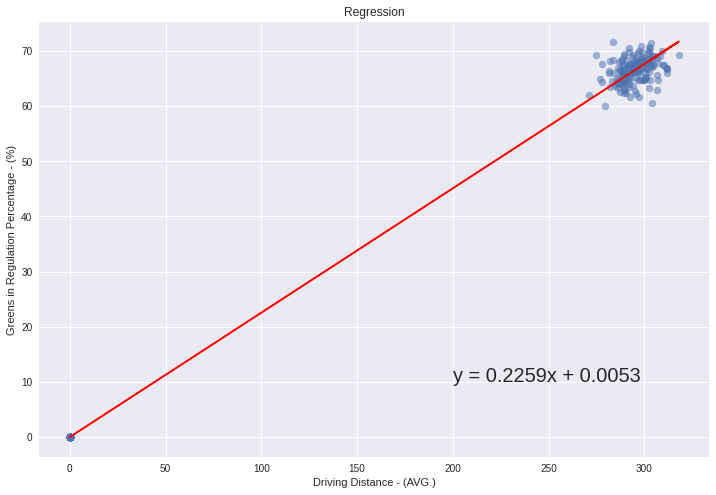

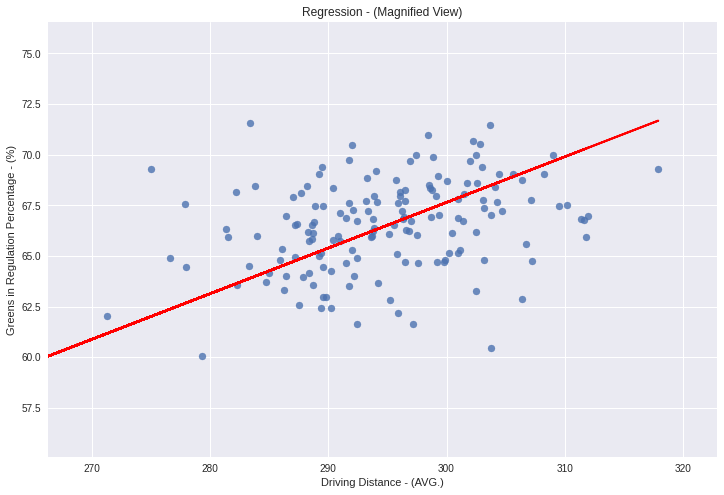

In [17]:
# Regression plot.

plt.style.use('seaborn')

fig2, ax1 = plt.subplots(1, 1, figsize=(12, 8))

ax1.scatter(x_train, y_train, alpha=0.5)
ax1.plot(x_train, ols_model_fitted_y, color='red', linewidth=2)

ax1.set_title('Regression')
ax1.set_xlabel(independent_var)
ax1.set_ylabel(dependent_var)
ax1.text(200, 10,'y = 0.2259x + 0.0053', fontsize=20)

fig3, ax1 = plt.subplots(1, 1, figsize=(12, 8))

ax1.scatter(x_train, y_train, alpha=0.8)
ax1.plot(x_train, ols_model_fitted_y, color='red', linewidth=2)

ax1.set_title('Regression - (Magnified View)')
ax1.set_xlabel(independent_var)
ax1.set_ylabel(dependent_var)
ax1.set_xbound(min([x for x in x_train[independent_var] if x!=0])-5, \
               max(x_train[independent_var])+5)
ax1.set_ybound(min([y for y in y_train[dependent_var] if y!=0])-5, \
               max(y_train[dependent_var])+5)

This plot illustrates the increasing linear relationship between Greens in Regulation and Driving Distance. Notice how the model fits in the cluster of 0's.
This is costing accuracy for all remaining y-values. The regression line cannot best fit the big cluster of points, shown in the bottom plot, if the same line
also needs to account for those 0 values. Since the line appears to split the cluster at a higher angle than it should, some predicted y values will be overfit, then
others will be underfit as the values of the independent variable increase.


Text(2.5, 1.25, 'mean = -0.0000\nstd = 0.9701')

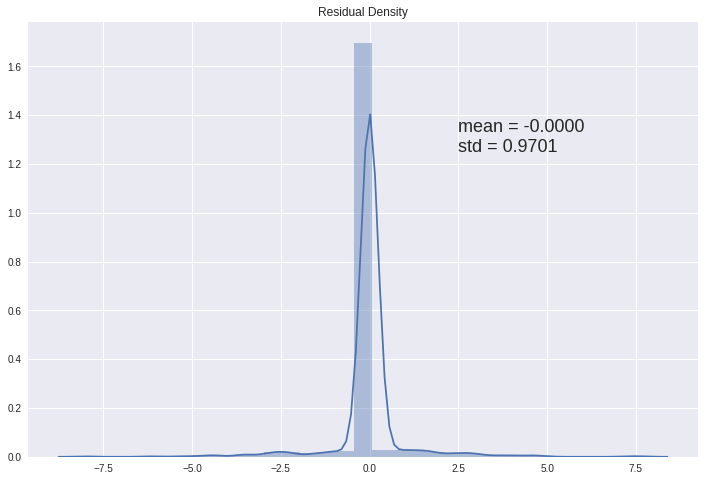

In [18]:
# Residuals density plot

mean = np.mean(ols_model_residuals)
std = np.std(ols_model_residuals)

kde = gaussian_kde(ols_model_residuals)
covf = kde.covariance_factor()
bw = covf * std
     
fig4, ax1 = plt.subplots(1, 1, figsize=(12, 8))

sns.distplot(ols_model_residuals, kde_kws={'bw': bw})

ax1.set_title('Residual Density')
ax1.text(2.5, 1.25, "mean = {:.4f}\nstd = {:.4f}".format(mean, std), fontsize=18)

Now that we can visualize the distribution of the residuals, it's clear that although the data is centered, most of it is located within half of a standard deviation from the mean, 
so it isn't normally distributed.

Text(0, 0.5, 'Standardized Residuals')

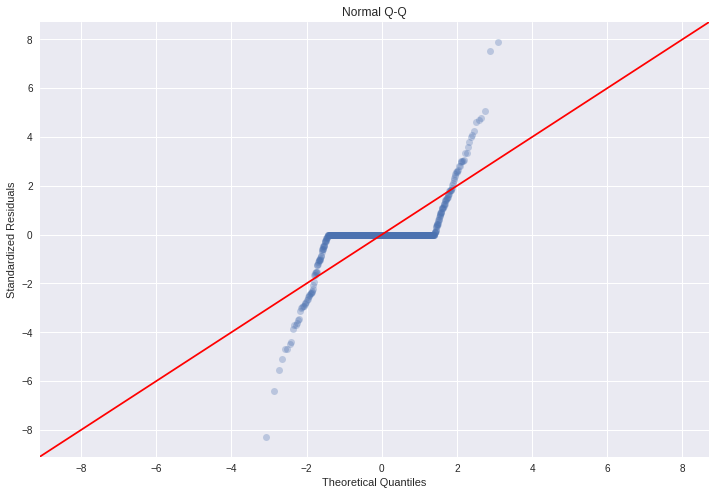

In [19]:
# Normal Q-Q plot.

fig5, ax1 = plt.subplots(figsize=(12, 8))

QQ = ProbPlot(ols_model_norm_residuals)

QQ.qqplot(line='45', alpha=0.3, lw=1, color='#4c72b0', ax=ax1)

ax1.set_title('Normal Q-Q')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Standardized Residuals')

This plot further confirms that the distribution of the residuals is not normal. The horizontal cluster of points represents all of the 
0 values that are fit perfectly onto the regression line. There are so many of them that they cover roughly 3.5 'quantiles', which is most
of the total distribution of the residuals. Since the model weighs all of these 0s the same as the other points, the fit is going to be
skewed towards them. So those 0 values will have 0 residuals, since the model fit the regression line directly through those points. Because
of this, the remaining points can't fulfil the necessary residual values that are needed to make the residual distribution normal. If I understand
this correctly, a model that could either remove the 0 values or give them less weight or importance, could fit a line through the data that would
reduce the range of the residual values and also reduce the amount of 0 valued residuals. This would potentially result in a normal distribution
of the residuals and thus a better model overall.

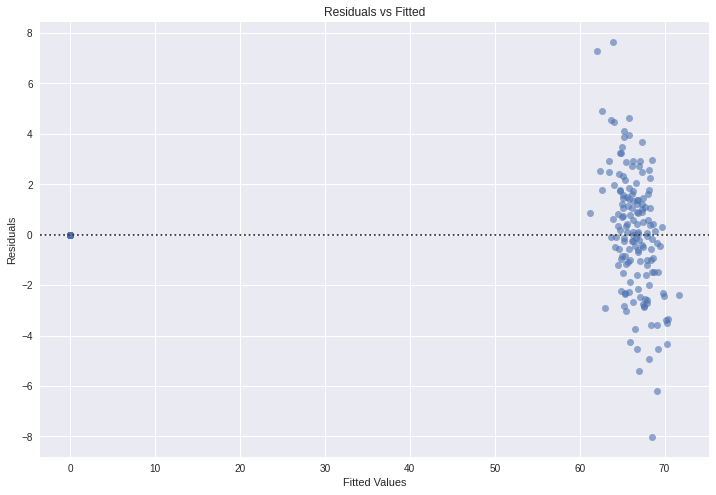

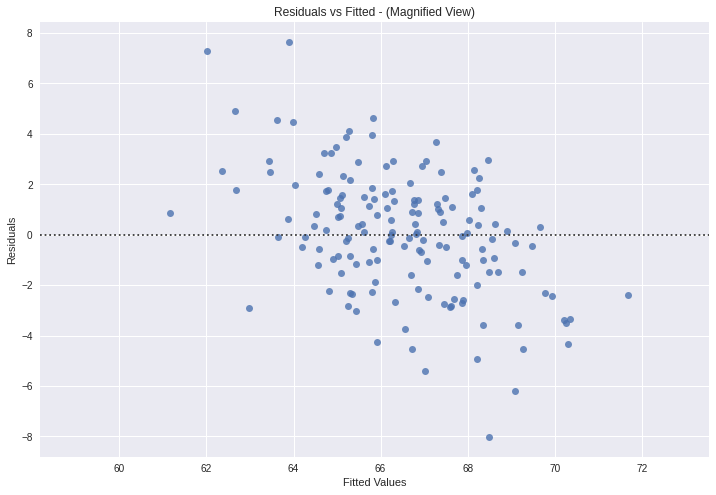

In [20]:
# Residuals vs Fitted plot.

fig6, ax1 = plt.subplots(1, 1, figsize=(12, 8))

sns.residplot(ols_model_fitted_y, train_df[dependent_var], lowess=False, ax=ax1, \
              scatter_kws={'alpha': 0.6}, line_kws={'color': 'red', 'lw': 2, 'alpha': 0.5})

ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals');

fig7, ax1 = plt.subplots(1, 1, figsize=(12, 8))

sns.residplot(ols_model_fitted_y, y_train[dependent_var], lowess=False, ax=ax1, \
              scatter_kws={'alpha': 0.8}, line_kws={'color': 'red', 'lw': 2, 'alpha': 0.5})

ax1.set_title('Residuals vs Fitted - (Magnified View)')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals');
ax1.set_xbound(min([x for x in ols_model_fitted_y if x>1])-3, \
               max(y_train[dependent_var])+2)

*The lowess lines wouldn't plot because there are too many replicant values in the data.*

I believe the variation in the residuals is homoskedastic, because the distribution seems to be uniform. The model appears to overfit values
in the low-60s to mid-60s, while underfitting values in the high-60s to low-70s. I think this is because the cluster of 0's is leveraging the slope
of the regression line.

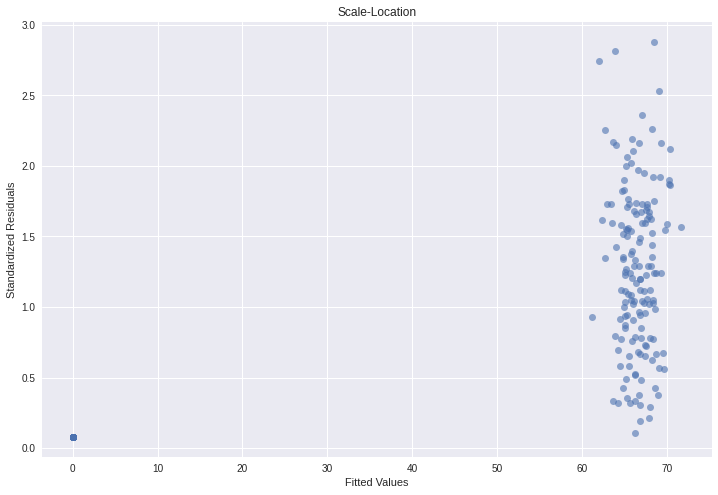

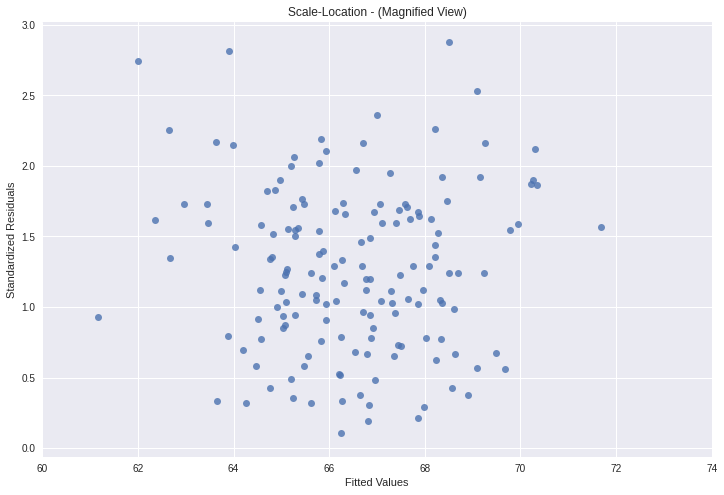

In [21]:
# Scale-Location plot.

fig8, ax1 = plt.subplots(1, 1, figsize=(12, 8))

sns.regplot(ols_model_fitted_y, ols_model_norm_residuals_abs_sqrt, ci=False, \
            lowess=False, scatter_kws={'alpha': 0.6}, fit_reg=False, ax=ax1, \
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.5})

ax1.set_title('Scale-Location')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Standardized Residuals')

fig9, ax1 = plt.subplots(1, 1, figsize=(12, 8))

sns.regplot(ols_model_fitted_y, ols_model_norm_residuals_abs_sqrt, ci=False, \
            lowess=False, scatter_kws={'alpha': 0.8}, fit_reg=False, ax=ax1, \
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.5})   

ax1.set_title('Scale-Location - (Magnified View)')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Standardized Residuals')
ax1.set_xbound(60, 74)

This plot shows that the residuals are evenly spread among the predictors. My one concern is that the amount of
0's is actually making this distribution skewed towards them. I can't tell from this plot alone, how many 0's there are.

Text(0, 0.5, 'Standardized Residuals')

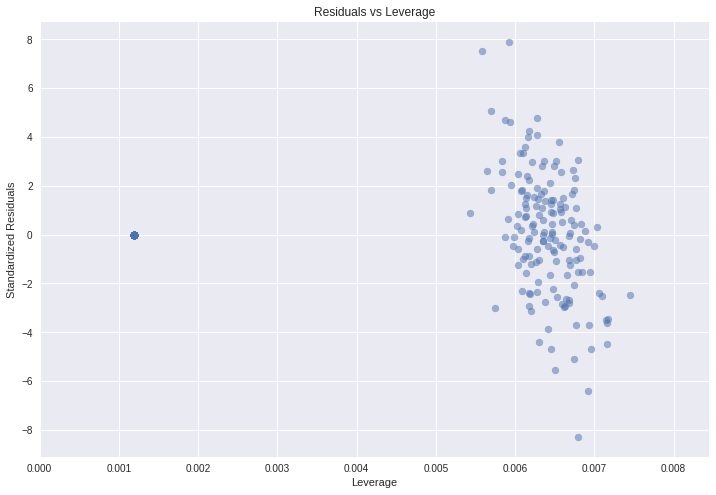

In [22]:
# Residuals vs Leverage plot.

fig10, ax1 = plt.subplots(figsize=(12,8))

plt.scatter(ols_model_leverage, ols_model_norm_residuals, alpha=0.5)

sns.regplot(ols_model_leverage, ols_model_norm_residuals, ax=ax1, \
              scatter=False, ci=False, lowess=False, fit_reg=False, \
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

ax1.set_xlim(0, max(ols_model_leverage)+0.001)
ax1.set_title('Residuals vs Leverage')
ax1.set_xlabel('Leverage')
ax1.set_ylabel('Standardized Residuals')

As expected the cluster of 0 values do not have any leverage on the model because the regression line was plotted onto those points. The remaining non-zero
predictors have slighly more leverage but not nearly enough to be considered outliers. The x-scale is only a range of 0.008, so very insignificant leverage.

<a id='new_OLS'></a>

# Ordinary Least Squares Regression With Zeros Removed
[Back to Table of Contents](#ToC)

Now I'll remove the 0 values from the data and generate another OLS model to see if performance is improved.

In [23]:
new_train_df = train_df.copy()

for idx, row in new_train_df.iterrows():
    if row[1] <= 0:
        new_train_df.drop(idx, axis=0, inplace=True)

new_x = pd.DataFrame(new_train_df[independent_var])
new_y = pd.DataFrame(new_train_df[dependent_var])

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.2)

new_X_train = sm.add_constant(new_x_train)

new_ols_model = sm.OLS(new_y_train, new_X_train).fit()

print(new_ols_model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Greens in Regulation Percentage - (%)   R-squared:                       0.110
Model:                                               OLS   Adj. R-squared:                  0.103
Method:                                    Least Squares   F-statistic:                     15.13
Date:                                   Tue, 02 Jun 2020   Prob (F-statistic):           0.000164
Time:                                           13:19:52   Log-Likelihood:                -263.34
No. Observations:                                    124   AIC:                             530.7
Df Residuals:                                        122   BIC:                             536.3
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

The coefficient of determination drastically decreased. The original model accounted for 99.8% of the variance in Green in Regulation,
where as the new model only explains 8.8% of variance in the dependent variable. This is due to the bias from the cluster of zeros. The trade off is that now the residuals are perhaps normally
distributed. Skew is slightly more centered and kurtosis is very much lowered. Also the co-efficient of the independent variable is much lower
than the original model. This is because the cluster of 0 has leveraged the slope of the regression line to be more steep so that it would reach
all of those points.

In [24]:
# Cross validate with the test set of data.

new_X_test = sm.add_constant(new_x_test)

new_ols_model_test = sm.OLS(new_y_test, new_X_test).fit()

print(new_ols_model_test.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Greens in Regulation Percentage - (%)   R-squared:                       0.061
Model:                                               OLS   Adj. R-squared:                  0.030
Method:                                    Least Squares   F-statistic:                     1.956
Date:                                   Tue, 02 Jun 2020   Prob (F-statistic):              0.172
Time:                                           13:19:52   Log-Likelihood:                -74.960
No. Observations:                                     32   AIC:                             153.9
Df Residuals:                                         30   BIC:                             156.9
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

The number of observations is very small, after removing values of zero. So I don't think that the differences in the train and test
sets are very significant.

<a id='new_OLS_analysis'></a>

## New OLS Model Analysis
[Back to Table of Contents](#ToC)

In [25]:
# Set variables for info from the model, to use for analysis.

# Model fitted values.
new_ols_model_fitted_y = new_ols_model.fittedvalues

# Model residuals.
new_ols_model_residuals = new_ols_model.resid

# Normalized residuals.
new_ols_model_norm_residuals = new_ols_model.get_influence().resid_studentized_internal

# Absolute squared normalized residuals.
new_ols_model_norm_residuals_abs_sqrt = np.sqrt(np.abs(new_ols_model_norm_residuals))

# Leverage.
new_ols_model_leverage = new_ols_model.get_influence().hat_matrix_diag

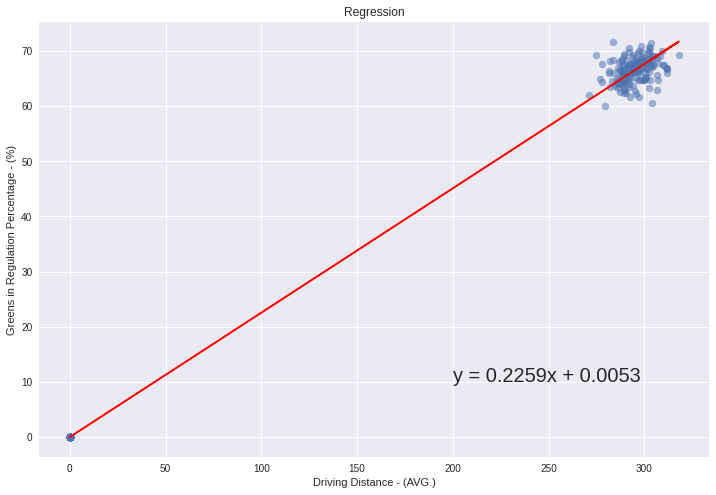

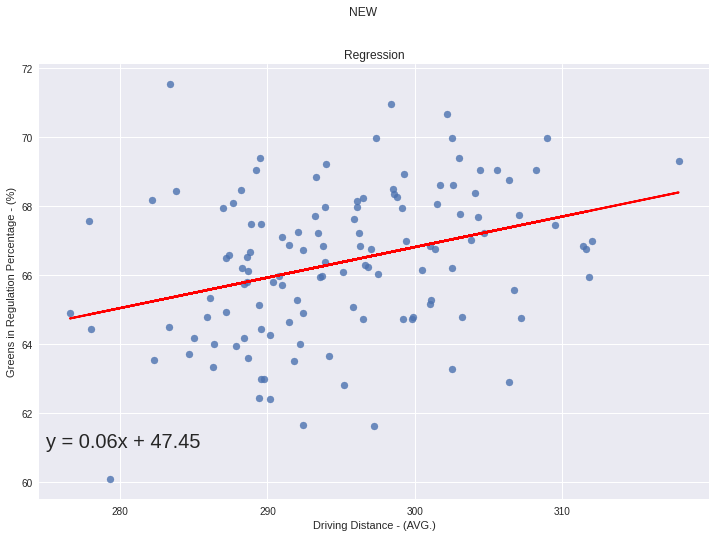

In [26]:
# New Regression plot.

fig11, ax1 = plt.subplots(1, 1, figsize=(12, 8))
fig11.suptitle('NEW')

ax1.scatter(new_x_train, new_y_train, alpha=0.8)
ax1.plot(new_x_train, new_ols_model_fitted_y, color='red', linewidth=2)

ax1.set_title('Regression')
ax1.set_xlabel(independent_var)
ax1.set_ylabel(dependent_var)
ax1.text(275, 61,'y = 0.06x + 47.45', fontsize=20)

# Compare with the original regression plot.
fig2

The new regression plot is essentially the entire cluster of non-zero points seen in the original regression. The difference is that now the model doesn't fit
the cluster of zeros so the regression line will be more true to all of the other predictors besides 0.

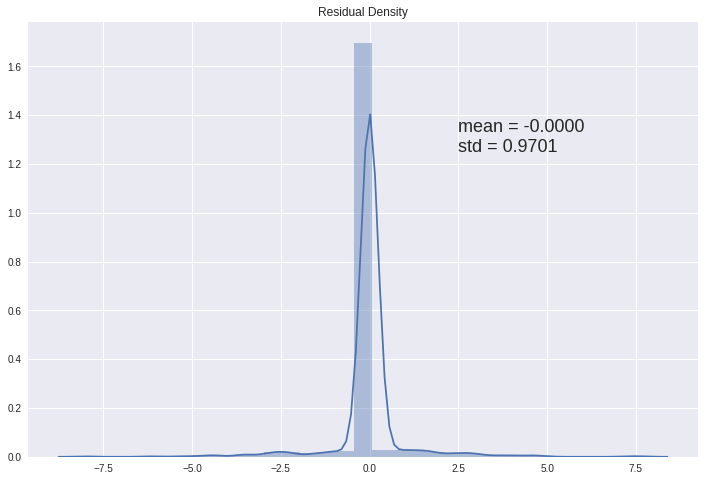

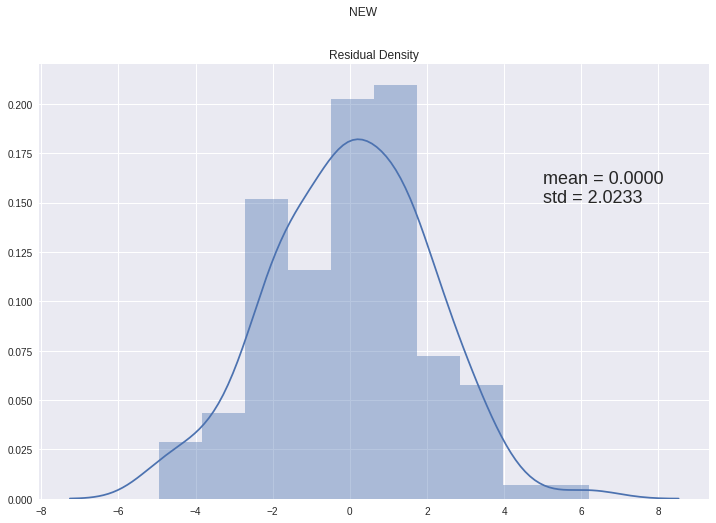

In [27]:
# New Residuals density plot

mean = np.mean(new_ols_model_residuals)
std = np.std(new_ols_model_residuals)

kde = gaussian_kde(new_ols_model_residuals)
covf = kde.covariance_factor()
bw = covf * std
     
fig12, ax1 = plt.subplots(1, 1, figsize=(12, 8))
fig12.suptitle('NEW')

sns.distplot(new_ols_model_residuals, kde_kws={'bw': bw}, ax=ax1)

ax1.text(5, 0.15, "mean = {:.4f}\nstd = {:.4f}".format(mean, std), fontsize=18)
ax1.set_title('Residual Density')

# Compare with original residual density plot.
fig4

The distribution of the residuals now appears to be normal after removing the 0 values. To be more sure, we'll run the residuals through a test.

In [28]:
# Test if residuals are normally distributed using a test that factors skew and kurtosis.

s, pval = stats.normaltest(new_ols_model_residuals)

if pval < 0.05:
    print('new_ols_model.resid is not normally distributed.')
else:
    print('new_ols_model.resid is normally distributed.')

new_ols_model.resid is normally distributed.


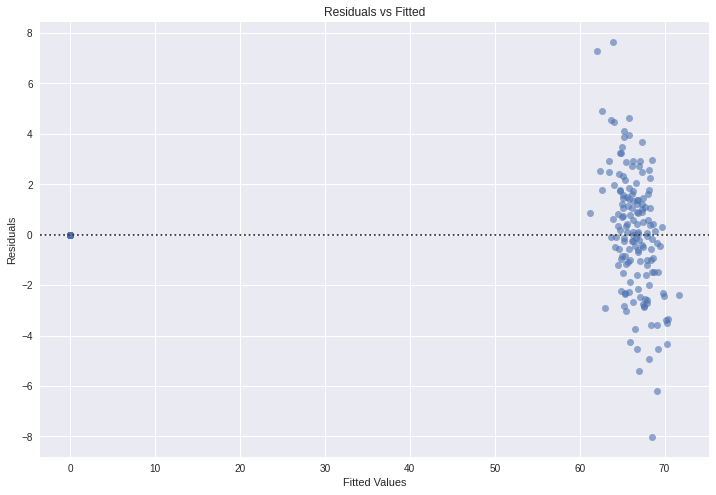

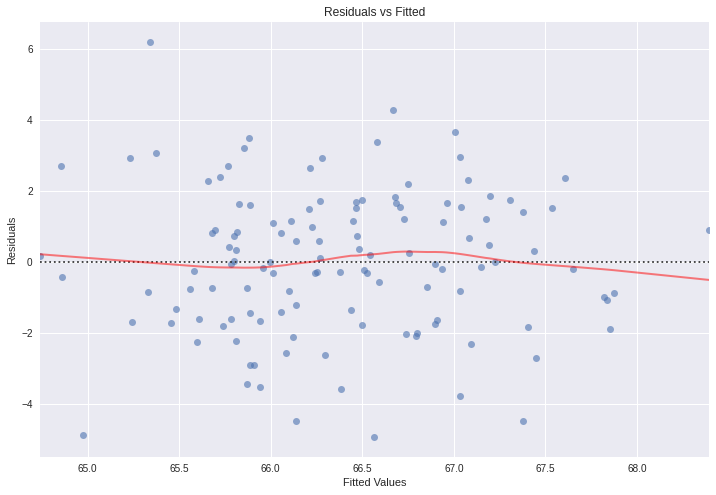

In [29]:
# Residuals vs Fitted plot.

fig13, ax1 = plt.subplots(1, 1, figsize=(12, 8))

sns.residplot(new_ols_model_fitted_y, new_y_train, lowess=True, ax=ax1, \
              scatter_kws={'alpha': 0.6}, line_kws={'color': 'red', 'lw': 2, 'alpha': 0.5})

ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals');

# Compare with the original residuals vs fitted plot
fig6

The lowess line has some arch in it, so there may be some bias in the data that's causing this.
Next we'll check for heteroskedasticity using a test.

In [30]:
# Use Breush-Pagan Test to check for heteroskedasticity.

test = smd.het_breuschpagan(new_ols_model_residuals, new_ols_model.model.exog)

if test[1] > 0.05:
    print('There is not enough evidence to conclude that there is heteroskedasticity in the data.')
else:
    print('There is enough evidence to conclude that there is heteroskedasticity in the data.')

There is not enough evidence to conclude that there is heteroskedasticity in the data.


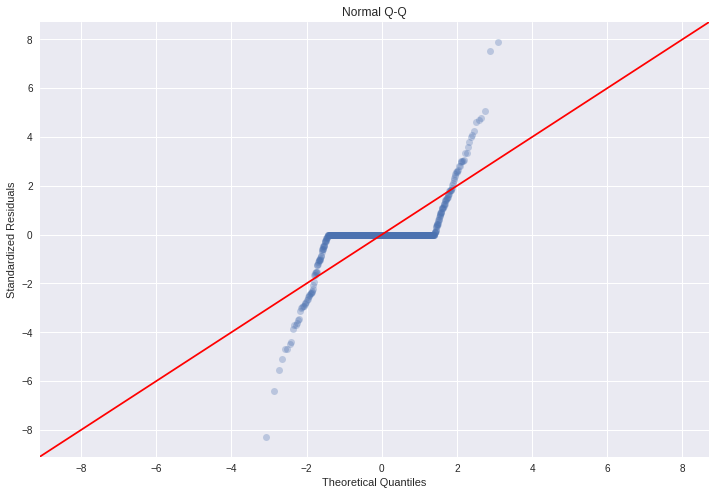

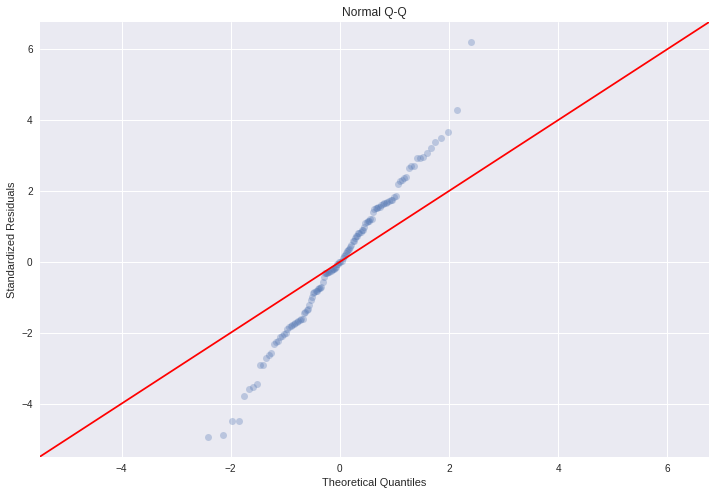

In [31]:
# New Normal Q-Q plot.

fig13, ax1 = plt.subplots(figsize=(12, 8))


QQ = ProbPlot(new_ols_model_residuals)

QQ.qqplot(line='45', alpha=0.3, lw=1, color='#4c72b0', ax=ax1)

ax1.set_title('Normal Q-Q')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Standardized Residuals')

# Compare to original Normal QQ plot
fig5

In the new plot, the line is much straighter. This illustrates that the distribution of residuals over the quantiles is more normal.
The line is straight, which leads us to believe that the residuals are normally distributed. Ideally, the line would follow the 45 
degree red line, but I don't think that it's much of an issue in this case. More than 95% of the standardized residuals still fall within
2 standard deviations of the mean, with standard deviation being 1. Then since there aren't really any clusters and the line is straight,
there aren't residuals values that are contributing much more than others.

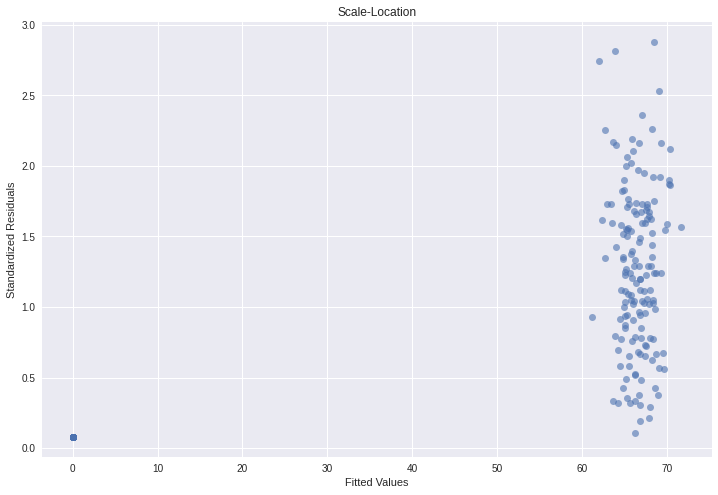

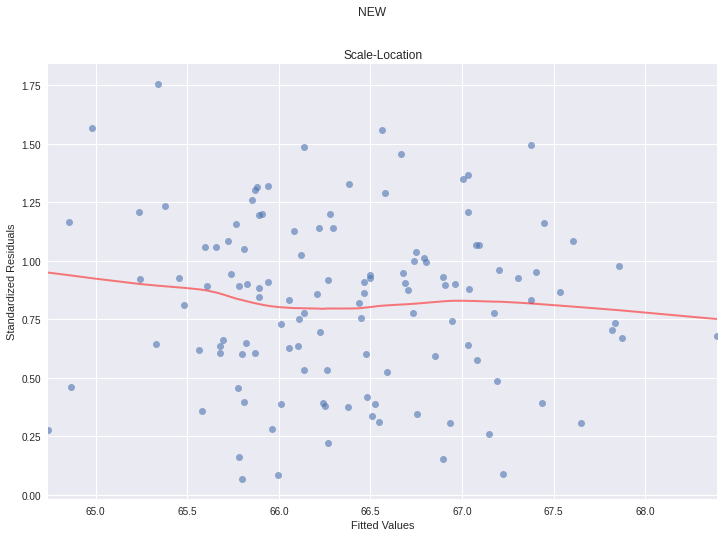

In [32]:
# New Scale-Location plot.

fig14, ax1 = plt.subplots(1, 1, figsize=(12, 8))
fig14.suptitle('NEW')

sns.regplot(new_ols_model_fitted_y, new_ols_model_norm_residuals_abs_sqrt, ci=False, \
            lowess=True, scatter_kws={'alpha': 0.6}, ax=ax1, \
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.5})

ax1.set_title('Scale-Location')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Standardized Residuals')

# Compare with original scale-location plot.
fig8

The data seemed homoskedastic before, apart from the cluster of zeros. The new plot appears to be even more homoskedastic. I can't know for certain
because I couldn't fit a regress line on the old plot due to all the replicant zero values.

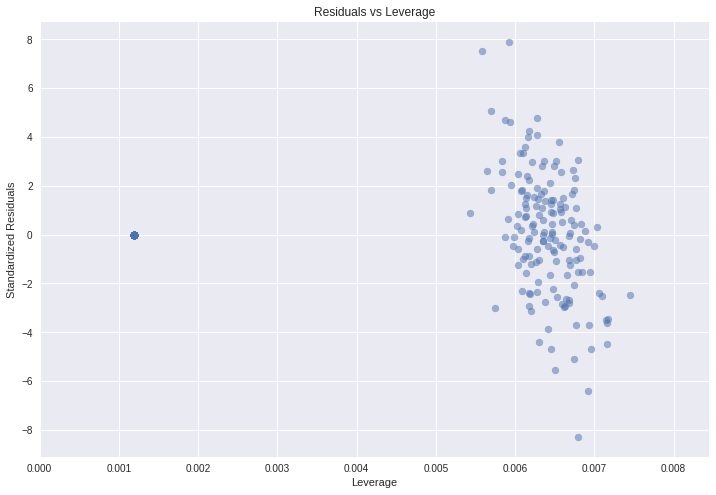

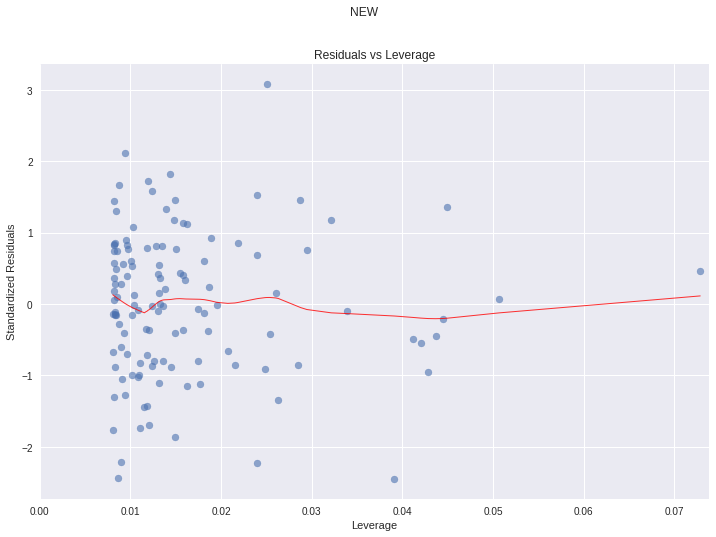

In [33]:
# Residuals vs Leverage plot.

fig15, ax1 = plt.subplots(figsize=(12,8))
fig15.suptitle('NEW')

plt.scatter(new_ols_model_leverage, new_ols_model_norm_residuals, alpha=0.6)

sns.regplot(new_ols_model_leverage, new_ols_model_norm_residuals, ax=ax1, \
              scatter=False, ci=False, lowess=True, \
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

ax1.set_xlim(0, max(new_ols_model_leverage)+0.001)
ax1.set_title('Residuals vs Leverage')
ax1.set_xlabel('Leverage')
ax1.set_ylabel('Standardized Residuals')

# Compare with original residuals vs leverage plot.
fig10

Before, the model was fit in favor of the 0-cluster. This consequently gave more leverage to non-zero points since they were
further away from the regression line. Now that the model better fits those non-zero points, they don't have as much leverage.


<a id='summary'></a>

# Summary
[Back to Table of Contents](#ToC)

The original correlation analysis was inaccurate because the data was zero inflated. This directly inflated the Pierson co-efficients for
perhaps every pair of variables. As a result, I inaccurately chose the dependent and independent variables because I thought they were more
correlated than they truly were. After generating an OLS model which used data without zeros, it was determined that there wasn't a linear
relationship between the chosen variables. As a result of a poor linear relationship, the fit of the model wasn't very good. The co-efficient
of determination dropped from 99.8% to merely 8.8%. Overall, the second model provided a more realistic fit for the data, although it wasn't
nearly as accurate.

Instead of continuing this notebook further, I'll make a new one that will account for the zero-inflation from the start. If I can analyze the 
correlation of variables without the bias from the zeros, then I should be able to choose better variables for the model and thus the model
should fit the data better. 

[Click here to see the updated OLS model](https://www.kaggle.com/ryanalbertson/ols-model-using-pga-tour-data)